In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# 读取用户上传的 Excel 文件
file_path = 'Q1.xlsx'
data = pd.read_excel(file_path)

# 检查数据结构
data.head()


,年份,经济增长率 (%),人均GDP (元),城镇化率 (%),城镇居民人均可支配收入 (元),Cat,Dog
0,2019,6.0,70892,60.60,42359,4412,5503
1,2020,2.3,72447,63.89,43834,4862,5222
2,2021,8.1,80976,64.72,47412,5806,5429
3,2022,3.0,85698,65.22,48283,6536,5119
4,2023,5.2,89358,66.30,51821,6980,5175


In [8]:
# 设置显示中文字体
plt.rcParams['font.sans-serif'] = ['SimHei']  # 使用黑体
plt.rcParams['axes.unicode_minus'] = False  # 正常显示负号

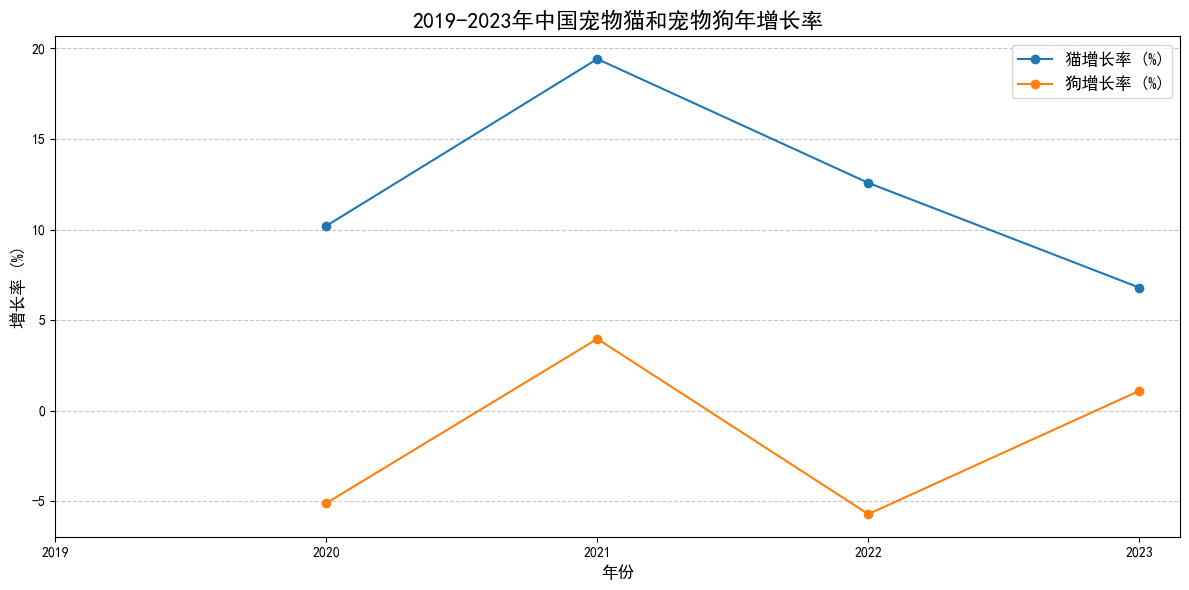

In [9]:
# 计算猫和狗的年增长率
data['Cat增长率 (%)'] = data['Cat'].pct_change() * 100
data['Dog增长率 (%)'] = data['Dog'].pct_change() * 100

# 创建增长率的可视化
plt.figure(figsize=(12, 6))
plt.plot(data['年份'], data['Cat增长率 (%)'], marker='o', label='猫增长率 (%)')
plt.plot(data['年份'], data['Dog增长率 (%)'], marker='o', label='狗增长率 (%)')

# 设置图表标题和标签
plt.title('2019-2023年中国宠物猫和宠物狗年增长率', fontsize=16)
plt.xlabel('年份', fontsize=12)
plt.ylabel('增长率 (%)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(fontsize=12)
plt.xticks(data['年份'])

# 显示图表
plt.tight_layout()
plt.show()


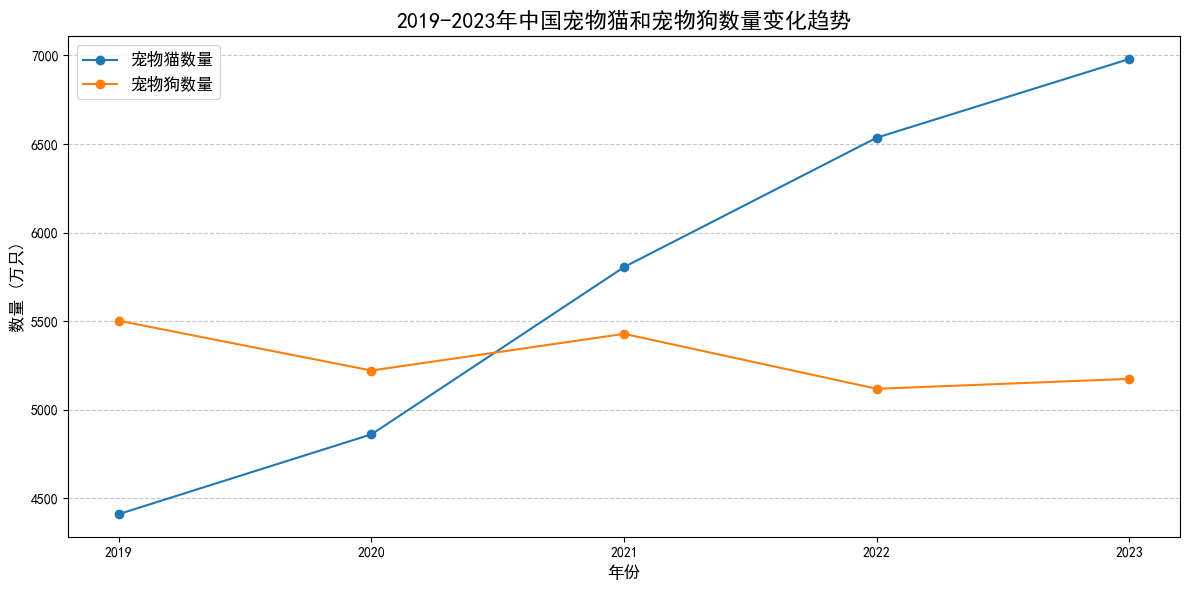

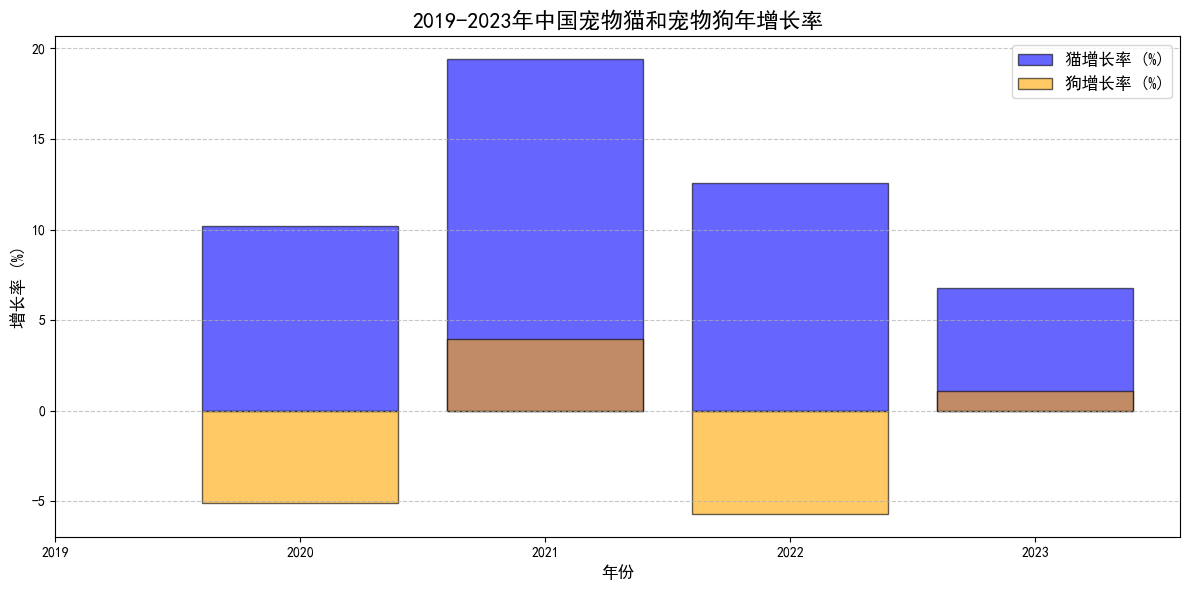

In [10]:
# 设置显示中文字体
plt.rcParams['font.sans-serif'] = ['SimHei']  # 使用黑体
plt.rcParams['axes.unicode_minus'] = False  # 正常显示负号

# 创建包含猫和狗数量随时间变化的可视化
plt.figure(figsize=(12, 6))
plt.plot(data['年份'], data['Cat'], marker='o', label='宠物猫数量')
plt.plot(data['年份'], data['Dog'], marker='o', label='宠物狗数量')

# 设置图表标题和标签
plt.title('2019-2023年中国宠物猫和宠物狗数量变化趋势', fontsize=16)
plt.xlabel('年份', fontsize=12)
plt.ylabel('数量 (万只)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(fontsize=12)
plt.xticks(data['年份'])

# 显示图表
plt.tight_layout()
plt.show()

# 创建包含猫和狗年增长率的可视化
plt.figure(figsize=(12, 6))
plt.bar(data['年份'], data['Cat增长率 (%)'], alpha=0.6, label='猫增长率 (%)', color='blue', edgecolor='black')
plt.bar(data['年份'], data['Dog增长率 (%)'], alpha=0.6, label='狗增长率 (%)', color='orange', edgecolor='black')

# 设置图表标题和标签
plt.title('2019-2023年中国宠物猫和宠物狗年增长率', fontsize=16)
plt.xlabel('年份', fontsize=12)
plt.ylabel('增长率 (%)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(fontsize=12)
plt.xticks(data['年份'])

# 显示图表
plt.tight_layout()
plt.show()


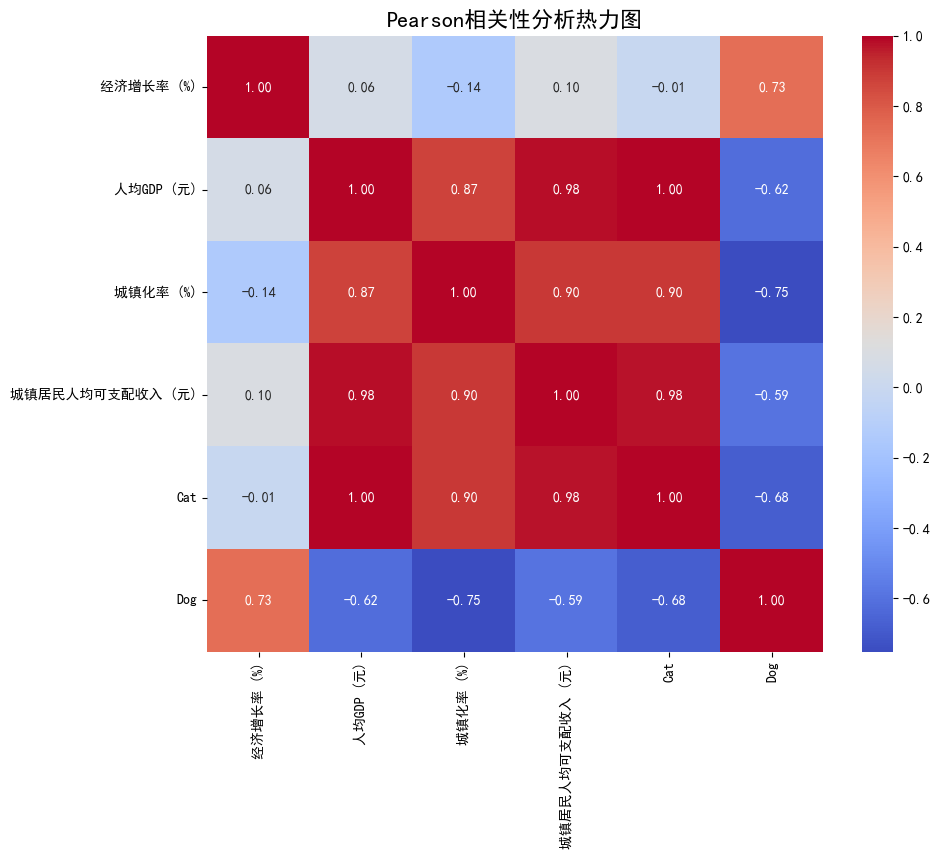

In [12]:
from scipy.stats import shapiro, spearmanr, pearsonr
import seaborn as sns

# 数据准备
variables = ['经济增长率 (%)', '人均GDP (元)', '城镇化率 (%)', '城镇居民人均可支配收入 (元)', 'Cat', 'Dog']
data_subset = data[variables]

# 正态性检验（Shapiro-Wilk检验）
normality_results = {var: shapiro(data_subset[var]) for var in variables}

# 显示正态性检验结果
normality_summary = pd.DataFrame({
    '变量': variables,
    'W值': [normality_results[var].statistic for var in variables],
    'p值': [normality_results[var].pvalue for var in variables],
    '是否正态分布': ['是' if normality_results[var].pvalue > 0.05 else '否' for var in variables]
})

# 根据正态性检验结果，选择相关性分析方法
# 如果所有变量正态分布，使用皮尔逊；否则使用斯皮尔曼
correlation_method = 'pearson' if all(normality_summary['是否正态分布'] == '是') else 'spearman'

# 计算相关性矩阵
correlation_matrix = data_subset.corr(method=correlation_method)

# 可视化相关性矩阵
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True, square=True)
plt.title(f'{correlation_method.capitalize()}相关性分析热力图', fontsize=16)
plt.show()


In [13]:
normality_summary

,变量,W值,p值,是否正态分布
0,经济增长率 (%),0.957054,0.787332,是
1,人均GDP (元),0.917409,0.513364,是
2,城镇化率 (%),0.900081,0.410332,是
3,城镇居民人均可支配收入 (元),0.963070,0.829181,是
4,Cat,0.946415,0.711568,是
5,Dog,0.896314,0.389850,是


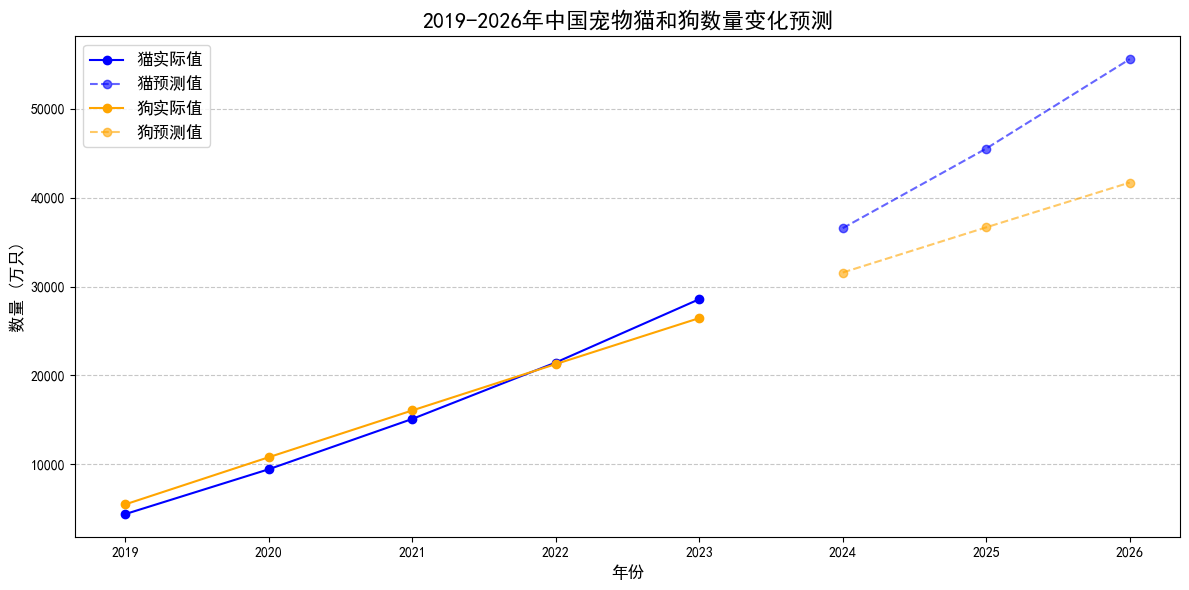

In [14]:
import numpy as np

# 数据提取
years = data['年份'].values
cat_data = data['Cat'].values
dog_data = data['Dog'].values

# 定义 GM(1,1) 模型
def gm11(x, n_pred):
    x1 = np.cumsum(x)  # 累加序列
    z1 = (x1[:-1] + x1[1:]) / 2.0  # 均值生成序列
    B = np.vstack([-z1, np.ones_like(z1)]).T
    Y = x[1:]
    u = np.linalg.inv(B.T @ B) @ B.T @ Y
    a, b = u[0], u[1]

    # 预测值生成
    def f(k):
        return (x[0] - b / a) * np.exp(-a * k) + b / a

    pred = [f(k) for k in range(len(x) + n_pred)]
    return np.array(pred[:len(x)]), np.array(pred[len(x):])

# 猫和狗的预测
n_pred = 3
cat_actual, cat_pred = gm11(cat_data, n_pred)
dog_actual, dog_pred = gm11(dog_data, n_pred)

# 未来年份
future_years = np.arange(years[-1] + 1, years[-1] + n_pred + 1)

# 可视化
plt.figure(figsize=(12, 6))
plt.plot(years, cat_actual, marker='o', label='猫实际值', color='blue')
plt.plot(future_years, cat_pred, marker='o', linestyle='--', label='猫预测值', color='blue', alpha=0.6)
plt.plot(years, dog_actual, marker='o', label='狗实际值', color='orange')
plt.plot(future_years, dog_pred, marker='o', linestyle='--', label='狗预测值', color='orange', alpha=0.6)
plt.title('2019-2026年中国宠物猫和狗数量变化预测', fontsize=16)
plt.xlabel('年份', fontsize=12)
plt.ylabel('数量 (万只)', fontsize=12)
plt.legend(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(list(years) + list(future_years))
plt.tight_layout()
plt.show()
